In [1]:
# Netflix

# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as ply
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")



# IMPORTING THE CSV FILES

In [3]:
Netflix = pd.read_csv('netflix1.csv')

In [4]:
Netflix

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


# Q1 Movies and TV Series distribution

Movie      6126
TV Show    2664
Name: type, dtype: int64


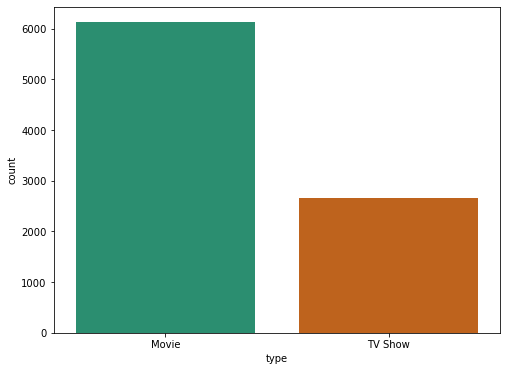

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(data=Netflix,x='type',palette='Dark2')
print(Netflix['type'].value_counts())

# Q2 Show or movie released with highest rating?

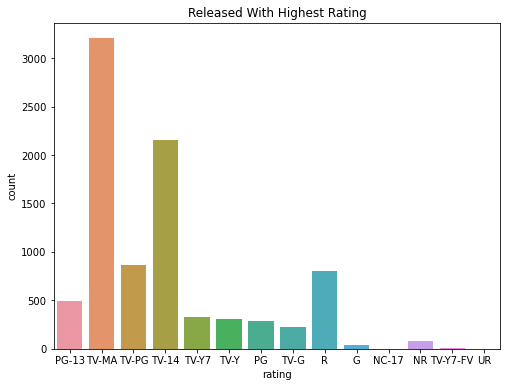

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='rating',data = Netflix)
plt.title("Released With Highest Rating")
plt.show()

# Q3 Which genre populate netflix the most?

In [7]:
Netflix['listed_in'] = Netflix['listed_in'].str.split(',')
genre = Netflix.explode('listed_in')
genre['listed_in'] = genre['listed_in'].apply(lambda x: x.strip())

genre_count=pd.DataFrame(genre.groupby(['listed_in'])['show_id'].count().sort_values(ascending=False))

genre_count.rename(columns={'show_id':'no_of_shows'},inplace=True)

genre_count['%_contribution'] = genre_count['no_of_shows'].apply(lambda x: (x/8807)*100)

genre_count.head(5)

,no_of_shows,%_contribution
listed_in,,
International Movies,2752,31.247871
Dramas,2426,27.546270
Comedies,1674,19.007608
International TV Shows,1349,15.317361
Documentaries,869,9.867151


<AxesSubplot:xlabel='no_of_shows', ylabel='listed_in'>

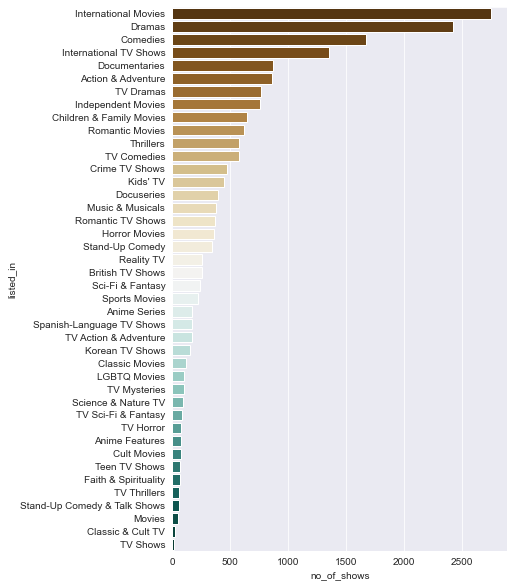

In [8]:
plt.figure(figsize=(6,10))
sns.set_style("darkgrid")
sns.barplot(data=genre_count,y=genre_count.index,x='no_of_shows',palette='BrBG')

In [9]:
##International movies, dramas and comedies are the netflix's favourites. These 3 genres cover 77% shows

# Q4 Which is the longest running tv show?

In [10]:
Netflix['duration'].unique()

array(['90 min', '1 Season', '91 min', '125 min', '9 Seasons', '104 min',
       '87 min', '127 min', '76 min', '71 min', '131 min', '39 min',
       '36 min', '34 min', '35 min', '46 min', '67 min', '65 min',
       '61 min', '166 min', '103 min', '97 min', '106 min', '2 Seasons',
       '4 Seasons', '147 min', '94 min', '161 min', '111 min', '110 min',
       '105 min', '96 min', '124 min', '116 min', '98 min', '115 min',
       '122 min', '55 min', '99 min', '88 min', '100 min', '6 Seasons',
       '3 Seasons', '23 min', '102 min', '93 min', '95 min', '85 min',
       '83 min', '182 min', '5 Seasons', '92 min', '84 min', '48 min',
       '145 min', '119 min', '80 min', '128 min', '143 min', '273 min',
       '117 min', '114 min', '118 min', '108 min', '37 min', '121 min',
       '63 min', '142 min', '113 min', '154 min', '120 min', '82 min',
       '109 min', '101 min', '86 min', '77 min', '229 min', '15 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '44 min',
  

In [11]:
Netflix[Netflix['duration'].str.contains("Seasons|Season",regex=True)==True]['type'].unique()

array(['TV Show'], dtype=object)

In [12]:
Netflix[Netflix['duration'].str.contains("Seasons|Season",regex=True)==False]['type'].unique()

array(['Movie'], dtype=object)

In [13]:
shows = Netflix[Netflix['type']=='TV Show']
shows.sample(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
7154,s2182,TV Show,Transformers Rescue Bots Academy,Not Given,United States,8/1/2020,2020,TV-Y,2 Seasons,[Kids' TV]
8630,s7784,TV Show,Power Rangers Turbo,Not Given,United States,1/1/2016,1997,TV-Y7,1 Season,[Kids' TV]
483,s5192,TV Show,The Family Court,Not Given,Pakistan,11/1/2017,2010,TV-MA,1 Season,"[International TV Shows, TV Dramas]"
6718,s670,TV Show,Locked Up,Not Given,Spain,6/19/2021,2020,TV-MA,5 Seasons,"[Crime TV Shows, International TV Shows, Spa..."
8285,s5823,TV Show,Cocaine,Not Given,United Kingdom,8/1/2016,2005,TV-14,1 Season,"[British TV Shows, Crime TV Shows, Docuseries]"


In [14]:
shows['duration'].unique()

array(['1 Season', '9 Seasons', '2 Seasons', '4 Seasons', '6 Seasons',
       '3 Seasons', '5 Seasons', '7 Seasons', '8 Seasons', '15 Seasons',
       '10 Seasons', '17 Seasons', '13 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='duration'>

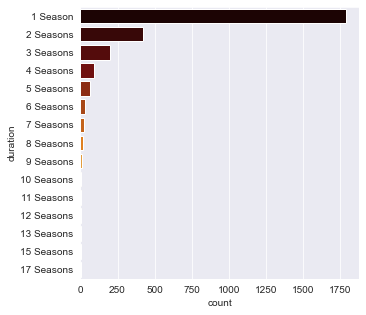

In [15]:
order = ['1 Season','2 Seasons','3 Seasons','4 Seasons','5 Seasons','6 Seasons','7 Seasons','8 Seasons','9 Seasons','10 Seasons','11 Seasons','12 Seasons','13 Seasons','15 Seasons','17 Seasons']
sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
sns.countplot(data=shows,y='duration',palette="afmhot",order=order)

In [16]:
shows.groupby('duration')['show_id'].count().sort_values(ascending=False)

duration
1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
12 Seasons       2
13 Seasons       2
15 Seasons       2
11 Seasons       1
17 Seasons       1
Name: show_id, dtype: int64

In [17]:
shows['title'][shows['duration']=='17 Seasons']

6697    Grey's Anatomy
Name: title, dtype: object

# Q5 Longest movie on netflix?

<AxesSubplot:xlabel='duration', ylabel='Count'>

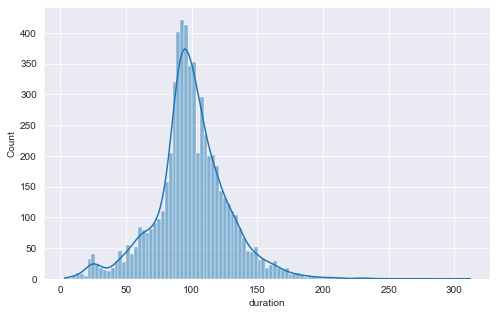

In [18]:
movies = Netflix[Netflix['type']=='Movie']

movies.dropna(inplace=True)

movies.duration=movies.duration.str.extract('(\d+)').astype('int32')

plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(data=movies,x='duration',kde=True)

In [19]:
##An one and half hour movie will not cause a headache, better than shows,
##not have to stick to plot. A perfect dinner time entertainment.......

In [20]:
movies[movies['duration']==movies['duration'].max()]['title']

7822    Black Mirror: Bandersnatch
Name: title, dtype: object

# Q6  Is netflix suitable for your kids?

In [21]:
rating['rating'].unique()

NameError: name 'rating' is not defined

In [ ]:
rating.groupby('rating')['show_id'].count().sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=rating,y='rating', order=rating['rating'].value_counts().index,palette='ocean')

In [ ]:
##TV-MA

##This rating is just to alert you that the content you're about to watch isn't suitable for audiences under 17.

##Yankes!!! 85% of the content on netflix should not be watched by children.

##Netflix only for adults!!!!!!!

# Q7 Largest influx of Movies in which year?

In [22]:
movies.sample(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
2194,s2734,Movie,Kapoor & Sons,Shakun Batra,India,4/1/2020,2016,TV-14,138,"[Comedies, Dramas, International Movies]"
3756,s5219,Movie,Belief: The Possession of Janet Moses,David Stubbs,New Zealand,10/15/2017,2015,TV-MA,90,"[Documentaries, International Movies]"
5433,s7433,Movie,Meditation Park,Mina Shum,Canada,3/9/2018,2017,TV-PG,94,[Dramas]
5038,s6941,Movie,Have You Seen the Listers?,Eddie Martin,Australia,2/1/2019,2017,TV-MA,86,"[Documentaries, International Movies]"
1307,s1421,Movie,"Crack: Cocaine, Corruption & Conspiracy",Stanley Nelson,United States,1/11/2021,2021,TV-MA,90,[Documentaries]


In [23]:
movies['added_year']= movies['date_added'].apply(lambda x: x[-4:])

In [24]:
movies['added_year'].unique()

array(['2021', '2019', '2020', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2009', '2008', '2010'], dtype=object)

In [25]:
movies['added_year'].value_counts()

2019    1424
2020    1284
2018    1237
2021     993
2017     836
2016     251
2015      56
2014      19
2011      13
2013       6
2012       3
2009       2
2008       1
2010       1
Name: added_year, dtype: int64

<AxesSubplot:xlabel='count', ylabel='added_year'>

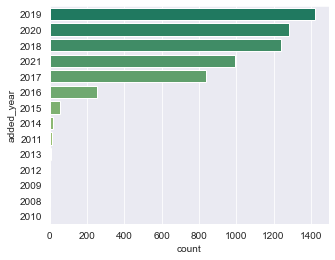

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(data=movies,y='added_year',palette='summer',order=movies['added_year'].value_counts().index)

In [27]:
##Netflix has gain popularty for movies around 2017.

##After that, Movies on netflix are increasing year on year.

##Then what about TV shows?

# Q8  Largest influx of TV Shows in which year?

In [28]:
shows.sample()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
7100,s2048,TV Show,Spirit Riding Free: Riding Academy,Not Given,United States,9/4/2020,2020,TV-Y7,2 Seasons,[Kids' TV]


In [29]:
shows.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [30]:
index=shows[shows['date_added'].isnull()].index
shows_1 = shows.drop(axis=0,index=index)

In [31]:
shows_1['added_year']= shows_1['date_added'].apply(lambda x: x[-4:])

In [32]:
shows_1['added_year'].unique()

array(['2021', '2018', '2020', '2019', '2017', '2016', '2015', '2013',
       '2014', '2008'], dtype=object)

In [33]:
shows_1['added_year'].value_counts()

2020    595
2019    592
2021    505
2018    411
2017    349
2016    175
2015     26
2013      5
2014      5
2008      1
Name: added_year, dtype: int64

<AxesSubplot:xlabel='count', ylabel='added_year'>

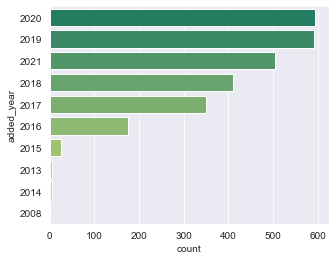

In [34]:
plt.figure(figsize=(5,4))
sns.countplot(data=shows_1,y='added_year',palette='summer',order=shows_1['added_year'].value_counts().index)

In [35]:
##In total, Netflix has gained popularity from 2017 onwards.

##Shows and movies are flooding the platform.

# Q9.  Types of Movies and TV Shows based on rating

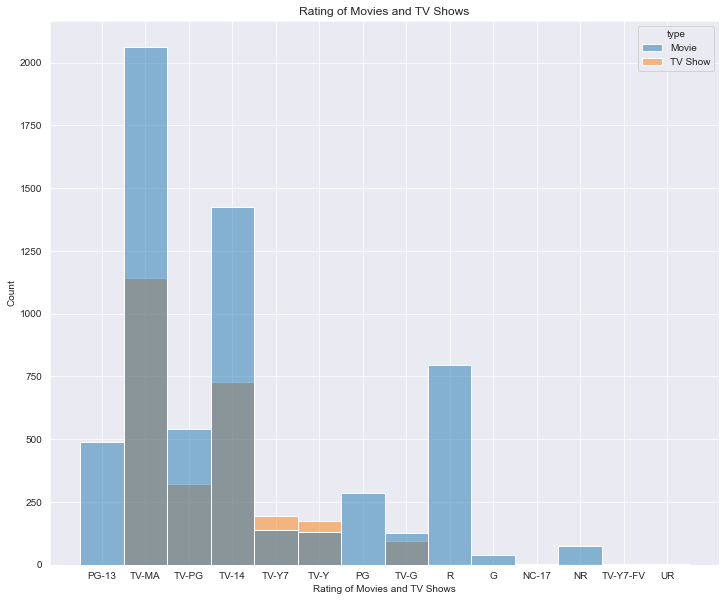

In [36]:
plt.figure(figsize=(12,10))
plt.title("Rating of Movies and TV Shows")
plt.xlabel('Rating of Movies and TV Shows')
sns.histplot(x="rating",hue='type',data=Netflix)
plt.show()

# Q10. Top 10 Genres streamed on Netflix

In [37]:
sns.countplot(y='listed_in', order=Netflix['listed_in'].value_counts().index[0:10],data=Netflix)
plt.title("Top 10 Genres streamed on Netflix")

TypeError: unhashable type: 'list'

# Q11. Top 10 Directors on netflix

In [1]:
sns.countplot(y='director', order=Netflix['director'].value_counts().index[0:10],data=Netflix)
plt.title("Top 10 Directors active on Netflix")

NameError: name 'sns' is not defined

# Q12. Ratio of TV Shows to Movies

In [ ]:
type_c = list(Netflix['type'].value_counts())
color = ['red','green']
type_lis = list(Netflix['type'].value_counts().index)
fig = px.pie(values=type_c,names=type_lis)
fig.update_layout(title_text='Ratio of TV Shows to Movies', title_x=0.5)
fig.update_traces(rotation=90,textposition='inside',textinfo='label+percent+value',marker=dict(colors=color))

# Q13. Relationship Between Release Year and Rating

In [2]:
x=Netflix['release_year']
y=Netflix['rating']
plt.figure(figsize = (12,8))
plt.scatter(x, y)
plt.show()

NameError: name 'Netflix' is not defined

# Q14.Distribution of Countries by the number of shows/movies they produce

In [3]:
Netflix['countries'] = Netflix['country'].apply(lambda x: x.split(', '))

# Create a list of all countries
all_countries = [country for sublist in Netflix['countries'] for country in sublist]

# Count the occurrences of each country
country_counts = pd.Series(all_countries).value_counts().head(10)

# Plotting the country counts
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='pink')
plt.xlabel('Countries')
plt.ylabel('Number of shows')
plt.title('Distribution of Countries')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()  
plt.show()

NameError: name 'Netflix' is not defined

# Q15.Distribution of Average duration of shows/movies

In [4]:
Netflix['duration'].value_counts().head(10).plot(kind='bar',color='pink')
plt.xlabel('Duration')
plt.ylabel('Number of shows')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

NameError: name 'Netflix' is not defined

# Q16. Distribution of shows release month

In [5]:
Netflix['date_added'] = pd.to_datetime(Netflix['date_added'])
Netflix['month_added'] = Netflix['date_added'].dt.month

monthly_counts = Netflix.groupby('month_added').size()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Shows/Movies Added')
plt.title('Number of Shows/Movies Added per Month')
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

# Q17. Top 10 highest rated show/movies?

In [6]:
sorted_df = Netflix.sort_values(by='rating', ascending=False)

top_n = 10
top_rated = sorted_df.head(top_n)

plt.figure(figsize=(12, 6))
plt.barh(top_rated['title'], top_rated['rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Show/Movie Title')
plt.title('Top {} Highest-Rated Shows/Movies'.format(top_n))
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

NameError: name 'Netflix' is not defined

# Q18. Distribution of shows/movies duration

In [7]:
def duration_to_minutes(duration):
    if 'min' in duration:
        return int(duration.split(' ')[0])
    elif 'Season' in duration:
        return int(duration.split(' ')[0]) * 25  # Assuming 1 season is approximately 25 episodes

Netflix['duration_minutes'] = Netflix['duration'].apply(duration_to_minutes)

plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='duration_minutes', data=Netflix, palette='pastel')
plt.xlabel('Type (TV Show or Movie)')
plt.ylabel('Duration (Minutes)')
plt.title('Distribution of Show/Movie Duration')
plt.tight_layout()
plt.show()

NameError: name 'Netflix' is not defined

# Q19. what is the content by Egyptians?

In [8]:
egp = Netflix[Netflix['country'] == 'Egypt']
pd.DataFrame(dict(egp[['title', 'director']].items()))

NameError: name 'Netflix' is not defined

In [9]:
fig = plt.figure(figsize = (50,50))
ax =sns.countplot(y='director', data=egp,palette='crest_r')
plt.title('Egyptian directors on Netflix', fontsize=70)
plt.show()

NameError: name 'plt' is not defined

In [10]:
##Youssif Chahine is the most popular egyptian director on netflix

# Q20. Comparison on basis of the content country watch Movie/show?

In [11]:
top_productive_countries=Netflix[(Netflix['country']=='United States')|(Netflix['country']=='India')|(Netflix['country']=='United Kingdom')|(Netflix['country']=='Japan')|
                             (Netflix['country']=='Canada')|(Netflix['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

NameError: name 'Netflix' is not defined

# Analysis Question 

# Q1. How to get first five rows of the table ?

In [12]:
Netflix.head()

NameError: name 'Netflix' is not defined

# Q2. How to get last five rows of the table ?

In [ ]:
Netflix.tail()

# Q3. How to get shape of the Table ?

In [38]:
Netflix.shape

(8790, 10)

# Q5. How to describe the table ?

In [39]:
Netflix.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Q6. How to get the columns ?

In [40]:
Netflix.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# Q7. How to get the null values ?

In [41]:
Netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

# Q8. How to check duplicate rows ?

In [42]:
Netflix.duplicated(["type","title","release_year"]).sum()

3

# Q9. How to delete the duplicate rows from dataset ?

In [43]:
duplicate_rows = Netflix[Netflix.duplicated(["type","title","release_year"], keep = False)]

In [44]:
duplicate_rows

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
393,s3997,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"[International TV Shows, TV Dramas]"
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"[International TV Shows, TV Dramas]"
2925,s3963,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"[Comedies, Dramas, Independent Movies]"
3285,s4523,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"[Dramas, Thrillers]"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"[Dramas, Thrillers]"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"[Comedies, Dramas, Independent Movies]"


In [45]:
rows_to_keep = duplicate_rows[["type","title","release_year"]].duplicated(keep='first')
rows_to_keep

393     False
537      True
2925    False
3285    False
4260     True
4261     True
dtype: bool

In [46]:
indexes_to_drop = duplicate_rows[~rows_to_keep].index
indexes_to_drop

Int64Index([393, 2925, 3285], dtype='int64')

In [47]:
Netflix = Netflix.drop(indexes_to_drop)

In [48]:
duplicate_rows = Netflix[Netflix.duplicated(["type","title","release_year"], keep = False)]
duplicate_rows

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


# Q10.How to count a particular group in a dataset ?

In [49]:
country_type_counts = Netflix.groupby(['country', 'type']).size().unstack()
country_type_counts

type,Movie,TV Show
country,,
Argentina,56.0,20.0
Australia,61.0,53.0
Austria,8.0,1.0
Bangladesh,3.0,NaN
Belarus,NaN,1.0
...,...,...
Uruguay,8.0,1.0
Venezuela,2.0,NaN
Vietnam,7.0,NaN


# Q.11.How to get  top 10 values in a dataset ?

In [50]:
top_10_countries = country_type_counts.sum(axis=1).nlargest(10).index
top_10_countries

Index(['United States', 'India', 'United Kingdom', 'Pakistan', 'Not Given',
       'Canada', 'Japan', 'South Korea', 'France', 'Spain'],
      dtype='object', name='country')

# Q12.How to count the top 10 values in a dataset ?

In [51]:
country_type_counts_top_10 = country_type_counts.loc[top_10_countries]
country_type_counts_top_10

type,Movie,TV Show
country,,
United States,2395.0,845.0
India,975.0,81.0
United Kingdom,387.0,251.0
Pakistan,71.0,349.0
Not Given,257.0,30.0
Canada,187.0,84.0
Japan,87.0,172.0
South Korea,49.0,165.0
France,148.0,65.0


# Q13.How to get  largest index in a dataset ?

In [52]:
dir_type_counts = Netflix.groupby(['director', 'type']).size().unstack()
dir_type_counts

type,Movie,TV Show
director,,
A. L. Vijay,2.0,NaN
A. Raajdheep,1.0,NaN
A. Salaam,1.0,NaN
A.R. Murugadoss,2.0,NaN
Aadish Keluskar,1.0,NaN
...,...,...
Çagan Irmak,1.0,NaN
Ísold Uggadóttir,1.0,NaN
Óskar Thór Axelsson,1.0,NaN


In [53]:
top_10_dir = dir_type_counts.sum(axis=1).nlargest(10).index
top_10_dir

Index(['Not Given', 'Rajiv Chilaka', 'Alastair Fothergill',
       'Raúl Campos, Jan Suter', 'Marcus Raboy', 'Suhas Kadav', 'Jay Karas',
       'Cathy Garcia-Molina', 'Jay Chapman', 'Martin Scorsese'],
      dtype='object', name='director')

In [54]:
dir_type_counts_top_10 = dir_type_counts.loc[top_10_dir]
dir_type_counts_top_10

type,Movie,TV Show
director,,
Not Given,173.0,2414.0
Rajiv Chilaka,19.0,1.0
Alastair Fothergill,4.0,14.0
"Raúl Campos, Jan Suter",18.0,NaN
Marcus Raboy,15.0,1.0
Suhas Kadav,16.0,NaN
Jay Karas,14.0,NaN
Cathy Garcia-Molina,13.0,NaN
Jay Chapman,12.0,NaN


# Q14. Which genre populate Netflix the most?

In [55]:
Netflix['listed_in'] = Netflix['listed_in'].str.split(',')
genre = Netflix.explode('listed_in')
genre['listed_in'] = genre['listed_in'].apply(lambda x: x.strip())

genre_count=pd.DataFrame(genre.groupby(['listed_in'])['show_id'].count().sort_values(ascending=False))

genre_count.rename(columns={'show_id':'no_of_shows'},inplace=True)

genre_count['%_contribution'] = genre_count['no_of_shows'].apply(lambda x: (x/8807)*100)

genre_count.head(5)

AttributeError: 'float' object has no attribute 'strip'

# Q15. Longest movie on Netflix?

In [ ]:
movies[movies['duration']==movies['duration'].max()]['title']

# Q16. Largest influx of Movies in which year?

In [ ]:
movies['added_year']= movies['date_added'].apply(lambda x: x[-4:])

In [ ]:
movies['added_year'].unique()

In [ ]:
movies['added_year'].value_counts()

# Q17. Largest influx of TV Shows in which year?

In [ ]:
shows_1['added_year'].value_counts()

# Q18. what is the content consumed by Egyptians?

In [ ]:
egp = Netflix[Netflix['country'] == 'Egypt']
pd.DataFrame(dict(egp[['title', 'director']].items()))

# Q19. What is the top 10 highest rated movie?

In [ ]:
sorted_df = Netflix.sort_values(by='rating', ascending=False)

top_n = 10
top_rated = sorted_df.head(top_n)




In [ ]:
top_rated

# Q20. What is the longest running TV-Show ?


In [ ]:
shows = Netflix[Netflix['type']=='TV Show']
shows.sample(5)

In [ ]:
shows.groupby('duration')['show_id'].count().sort_values(ascending=False)

In [ ]:
shows['title'][shows['duration']=='17 Seasons']

In [57]:
plt.scatter(date_added, release_year )
plt.show()

NameError: name 'date_added' is not defined